In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geometry as geo
from scipy.spatial import Voronoi, voronoi_plot_2d

(-200.0, 200.0)

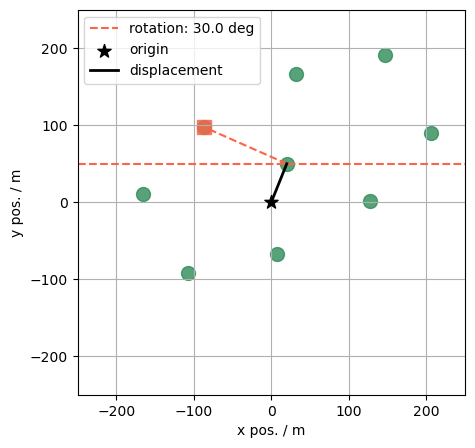

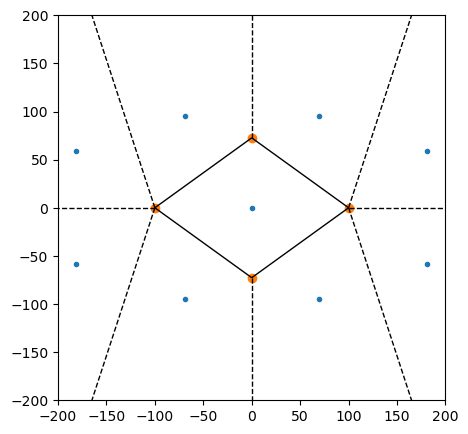

In [10]:
# 9 str geometry
symmetry = 5
angle = np.deg2rad(360 / symmetry)  # pentagram angle, fixed

string_displacement = np.array([20, 50])  # displacement of center
rotation_angle = np.deg2rad(30)  # rotation angle

# set up the baseline geometry
outer_scale = 100  # distance from center to outer strings
# no centers
# pentagram
pentagram = outer_scale * geo.create_symmetry(symmetry)

# additional partial pentagram
pent2 = outer_scale * geo.create_symmetry(symmetry, starting_angle=-1.5*angle, N_partial=4)
pent2 = geo.apply_displacement(pent2, 2 * outer_scale * np.array([1, 0]))

baseline_string_positions = np.concatenate([pentagram, pent2])
# shift center to 0,0
baseline_string_positions = geo.apply_displacement(baseline_string_positions, outer_scale * np.array([-1, 0]))

string_positions = geo.apply_transformations(
    baseline_string_positions, string_displacement, rotation_angle
)

# visualization
size = 100
color = "seagreen"
ref_color = "tomato"
plt.figure(figsize=(5, 5))
plt.scatter(string_positions[:, 0], string_positions[:, 1], s=size, c=color, alpha=0.8)
# ref string to visualize rotation:
plt.scatter(
    string_positions[1, 0],
    string_positions[1, 1],
    s=size,
    c=ref_color,
    alpha=0.8,
    marker="s",
)
# visualize rotation
plt.axhline(string_displacement[1], color=ref_color, ls="--")
plt.plot(
    [string_displacement[0], string_positions[1, 0]],
    [string_displacement[1], string_positions[1, 1]],
    color=ref_color,
    ls="--",
    label=f"rotation: {np.rad2deg(rotation_angle):1.1f} deg",
)
# visualize displacement of central string:
dis_color = "k"
plt.scatter(0, 0, marker="*", s=size, color=dis_color, label="origin", zorder=10)
plt.plot(
    [0, string_displacement[0]],
    [0, string_displacement[1]],
    lw=2,
    label="displacement",
    color=dis_color,
)
plt.grid()
plt.xlabel("x pos. / m")
plt.ylabel("y pos. / m")
plt.legend()

lims = 250
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)

vr = Voronoi(baseline_string_positions)
f, ax = plt.subplots(figsize=(5, 5))
f = voronoi_plot_2d(vr, ax=ax)
lims = 200
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)

(-200.0, 200.0)

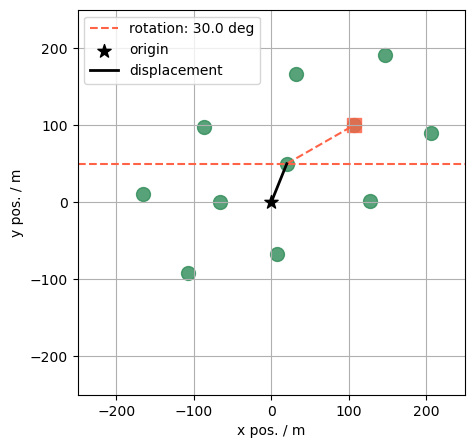

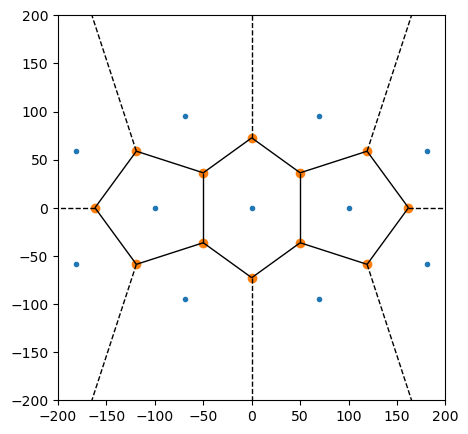

In [11]:
# 11 str geometry
symmetry = 5
angle = np.deg2rad(360 / symmetry)  # pentagram angle, fixed

string_displacement = np.array([20, 50])  # displacement of center
rotation_angle = np.deg2rad(30)  # rotation angle

# set up the baseline geometry
outer_scale = 100  # distance from center to outer strings
# centers
baseline_string_positions = np.array(
    [np.array([0, 0]), 2 * outer_scale * np.array([1, 0])]
)

# pentagram
pentagram = outer_scale * geo.create_symmetry(symmetry)

# additional partial pentagram
pent2 = outer_scale * geo.create_symmetry(symmetry, starting_angle=-1.5*angle, N_partial=4)
pent2 = geo.apply_displacement(pent2, 2 * outer_scale * np.array([1, 0]))

baseline_string_positions = np.concatenate([baseline_string_positions, pentagram, pent2])
# shift center to 0,0
baseline_string_positions = geo.apply_displacement(baseline_string_positions, outer_scale * np.array([-1, 0]))

string_positions = geo.apply_transformations(
    baseline_string_positions, string_displacement, rotation_angle
)

# visualization
size = 100
color = "seagreen"
ref_color = "tomato"
plt.figure(figsize=(5, 5))
plt.scatter(string_positions[:, 0], string_positions[:, 1], s=size, c=color, alpha=0.8)
# ref string to visualize rotation:
plt.scatter(
    string_positions[1, 0],
    string_positions[1, 1],
    s=size,
    c=ref_color,
    alpha=0.8,
    marker="s",
)
# visualize rotation
plt.axhline(string_displacement[1], color=ref_color, ls="--")
plt.plot(
    [string_displacement[0], string_positions[1, 0]],
    [string_displacement[1], string_positions[1, 1]],
    color=ref_color,
    ls="--",
    label=f"rotation: {np.rad2deg(rotation_angle):1.1f} deg",
)
# visualize displacement of central string:
dis_color = "k"
plt.scatter(0, 0, marker="*", s=size, color=dis_color, label="origin", zorder=10)
plt.plot(
    [0, string_displacement[0]],
    [0, string_displacement[1]],
    lw=2,
    label="displacement",
    color=dis_color,
)
plt.grid()
plt.xlabel("x pos. / m")
plt.ylabel("y pos. / m")
plt.legend()

lims = 250
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)

vr = Voronoi(baseline_string_positions)
f, ax = plt.subplots(figsize=(5, 5))
f = voronoi_plot_2d(vr, ax=ax)
lims = 200
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)